# Problem Set 1: Descriptive Analytics

* Authors: `Jangwon Park, [ADD YOUR NAME HERE]`
* Emails: `jangwon.park@epfl.ch, [ADD YOUR EMAIL HERE]`

# Problem Description

* A telecom company is interested in segmenting loyal customers in order to optimize customer retention effort.
* Our goal is to describe the data in preparation for this task.
* It is our assumption to claim that the following are important factors in deciding whether a customer is valuable:
    * His/her tenure (the longer, the better)
    * His/her monthly charges (the higher, the better)
* Note: the type of services that customers subscribe to is less important since they are reflected in monthly charges.

# Proposed Outline
### Section I: Importing Data & Data Cleaning
* Import data
* How many observations do we have?
* How many variables (features) do we have?
* Check missing values
    * If there are missing values, impute mean values in their place (for now)
* Check variable types
    * What type of variables do we have?
    * Are some variable types wrong?
    * How many of each type do we have?

### Section II: Descriptive Statistics
* Monthly earnings
    * How much does the company earn per month in total?
    * What does the distribution look like?
        * Mean, median, standard deviation, mode
* Customer demographics
    * Distribution of tenures
        * Mean, median, standard deviation, mode
    * How many males and females?
    * How many seniors and non-seniors?
    * How many partners?

### Section III: Correlations & Contingency Tables
* Pairewise correlation plots among continuous variables
    * Are there any significant linear relationships among the continuous variables?
* Contingency tables among categorical variables
    * Are female and male customers statistically different in:
        * How long they have stayed with the company (tenure)?
        * How much they pay monthly?
    * Ask the same questions with:
        * Senior vs. non-senior
        * Partner vs. non-partner
        * Dependents vs. no dependents
        * Contract type
        * Billing type
        * Payment method
        
---------------------------------------------------------------------------------------------------------------------------

# Section I: Importing Data & Data Cleaning

### Import data

In [65]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Import .csv file as a dataframe
data = pd.read_csv('Telco-Customer-Churn.csv')

# Count number of observations and features
obs, nvar = data.shape
print('Number of observations: {x:}'.format(x=obs))
print('Number of variables: {x:}'.format(x=nvar))

# View table
data.head()

Number of observations: 7043
Number of variables: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check missing data

In [36]:
# Are they empty cells?
for i in range(len(data.columns)):
    counter = 0
    for j in range(len(data)):
        if data[data.columns[i]][j]==' ':
            counter += 1        
    print('Empty cells in {f:}: {n:}'.format(f=data.columns[i], n=counter))

Empty cells in customerID: 0
Empty cells in gender: 0
Empty cells in SeniorCitizen: 0
Empty cells in Partner: 0
Empty cells in Dependents: 0
Empty cells in tenure: 0
Empty cells in PhoneService: 0
Empty cells in MultipleLines: 0
Empty cells in InternetService: 0
Empty cells in OnlineSecurity: 0
Empty cells in OnlineBackup: 0
Empty cells in DeviceProtection: 0
Empty cells in TechSupport: 0
Empty cells in StreamingTV: 0
Empty cells in StreamingMovies: 0
Empty cells in Contract: 0
Empty cells in PaperlessBilling: 0
Empty cells in PaymentMethod: 0
Empty cells in MonthlyCharges: 0
Empty cells in TotalCharges: 11
Empty cells in Churn: 0


### Check and fix some variable types

In [37]:
# `TotalCharges` should be a numeric feature
print('BEFORE Variable type of `TotalCharges`: {t:}'.format(t=type(data['TotalCharges'][0])))

# Convert to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print('AFTER Variable type of `TotalCharges`: {t:}'.format(t=type(data['TotalCharges'][0])))

BEFORE Variable type of `TotalCharges`: <class 'str'>
AFTER Variable type of `TotalCharges`: <class 'numpy.float64'>


### Impute mean values for empty cells

In [38]:
data['TotalCharges'].loc[data['TotalCharges'].isnull()] = np.mean(data)['TotalCharges']

C:\Users\Jangw\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Count different types of variables

In [39]:
# Describe variable types
n_nom = 0 # number of nominal variables
n_num = 0 # number of numeric variables
n_ord = 0 # number of ordinal variables
for i,j in enumerate(data.columns):
    if type(data[j][0]) == str:
        n_nom += 1
    elif len(set(data[j])) <= 2:
        n_nom += 1
    else:
        if j=='SeniorCitizen':
            print(set(data[j]))
        n_num += 1

print('Number of nominal variables: {n:}'.format(n=n_nom))
print('Number of ordinal variables: {n:}'.format(n=n_ord))
print('Number of numeric (continuous) variables: {n:}'.format(n=n_num))

Number of nominal variables: 18
Number of ordinal variables: 0
Number of numeric (continuous) variables: 3


# Section II: Descriptive Statistics

### Monthly earnings

### Customer demographics summary

In [107]:
# Summarize in a pivot table
pd.pivot_table(data,index=['gender','SeniorCitizen','Partner','Dependents'],values='Contract',aggfunc=len,margins=True)

Contract
gender SeniorCitizen Partner Dependents          
Female 0             No      No              1338
                             Yes              142
                     Yes     No               596
                             Yes              844
       1             No      No               317
                             Yes                3
                     Yes     No               209
                             Yes               39
Male   0             No      No              1381
                             Yes              211
                     Yes     No               567
                             Yes              822
       1             No      No               244
                             Yes                5
                     Yes     No               281
                             Yes               44
All                                          7043

### Count Plots

Text(0.5, 1.0, 'Dependents vs. No Dependents Counts')

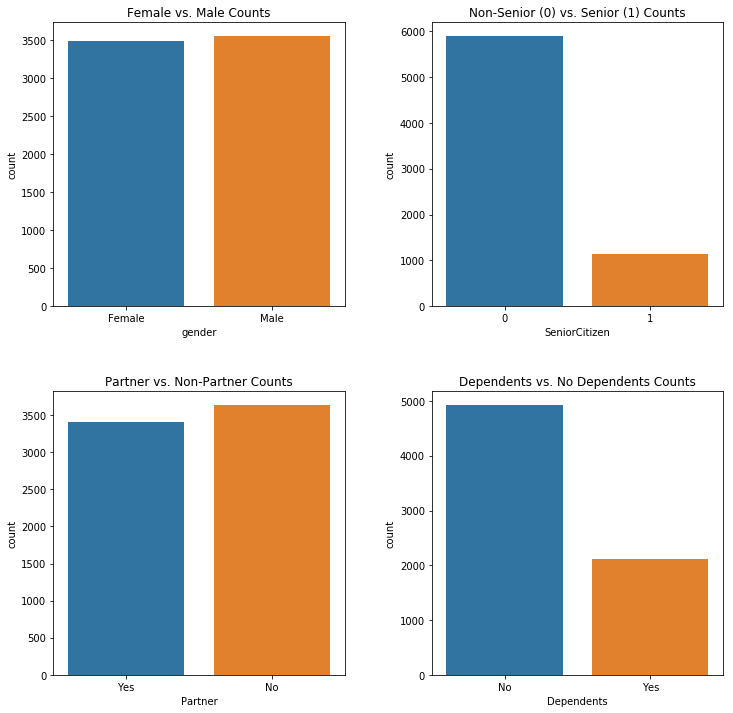

In [106]:
# Count plots of different attributes
fig, ax = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

sns.countplot(data.gender, ax=ax[0,0]).set_title('Female vs. Male Counts')
sns.countplot(data.SeniorCitizen, ax=ax[0,1]).set_title('Non-Senior (0) vs. Senior (1) Counts')
sns.countplot(data.Partner, ax=ax[1,0]).set_title('Partner vs. Non-Partner Counts')
sns.countplot(data.Dependents, ax=ax[1,1]).set_title('Dependents vs. No Dependents Counts')

# Section III: Correlations & Contingency Tables

### Correlation

### Contingency tables (unfinished)

In [9]:
table1 = sm.stats.Table.from_data(data[['Churn', 'gender']])
table2 = sm.stats.Table.from_data(data[['Churn', 'SeniorCitizen']])
table3 = sm.stats.Table.from_data(data[['Churn', 'Partner']])
print(table1.table_orig, '\n')
print(table2.table_orig, '\n')
print(table3.table_orig, '\n')

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930 

SeniorCitizen     0    1
Churn                   
No             4508  666
Yes            1393  476 

Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669 

